# CP213: Tutorial Notebook 9


## Question 1

A spherical projectile of diameter $D=42.67\,{\rm mm}$ and mass
$45.9\,{\rm g}$ initially located at the origin is struck so it has an
initial speed $v_0=70\,{\rm m\,s}^{-1}$ directed at an angle of
$\theta=45^\circ$ from the horizontal (aligned with the
$x$-direction).  It travels a gravitational field $g=9.81\,{\rm
m\,s}^{-2}$ which points in the negative $y$-direction.

The drag force $F_d$ on the sphere is given by
\begin{align*}
F_d &= C_d A \frac{1}{2}\rho v^2
\end{align*}
where $C_d=0.44$ is the drag coefficient for the sphere, $A=\pi D^2/4$
is the cross-sectional area of the projectile, $\rho=1.2\,{\rm
kg\,m^{-3}}$ is the density of air, and $v$ is the speed of the
sphere.

1. Perform a $x$-momentum and $y$-momentum balance to develop a pair
   of differential equations that govern how the $x$- and $y$-velocity of the
   projectile vary with time.

2. Use the Euler method to solve the differential equations derived
   above.  Benchmark your code against the case where there is no drag
   and the equations can be solved analytically.  In addition, you can
   also compare your solution with that from
   [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html).

3. Plot the trajectory (i.e. $y(t)$ vs $x(t)$) of the projectile with
   time, from $t=0$ until it hits the ground (located at $y=0$).  You
   will need to include the differential equations that relate the
   $x$- and $y$-coordinates of the projectile to its velocity.

4. What is the initial angle $\theta$ where the projectile will travel
   the furthest in the $x$-direction?
   
5. If the drag coefficient $C_d$ varies with the speed of the
   projectile as [Goossens 2019](https://dx.doi.org/10.1016/j.powtec.2019.04.075)
\begin{align*}
C_d &\approx \frac{24}{\rm Re} + 0.44
\end{align*}
where the Reynolds number Re is defined as
\begin{align*}
{\rm Re}
&= \frac{D \rho v}{\mu}
\end{align*}
with $\mu=1.8\times10^{-5}\,{\rm Pa\,s}$, redetermine the trajectory
of the projectile.


Below is some sample code that solves the [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)
using the `solve_ivp` function from `scipy`
\begin{align*}
\frac{dy_0}{dt} &= ay_0 - by_0y_1
\\
\frac{dy_1}{dt} &= -cy_1 + dy_0y_1
\end{align*}
where $a=1.5$, $b=1$, $c=3$, and $d=1$.  The initial conditions are
$y_0(0)=10$, and $y_1(0)=5$.


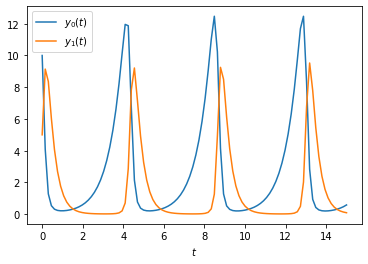

In [1]:
import numpy as np
import pylab as plt
from scipy.integrate import solve_ivp


def dydt(t, y):
 
    a=1.5
    b=1
    c=3
    d=1

    f = []
    f.append( a*y[0] - b*y[0]*y[1])
    f.append(-c*y[1] + d*y[0]*y[1])
    
    return f

t_init = 0.0
t_final = 15.0
t_dat = np.linspace(t_init, t_final, 100)
y_init = [10.0, 5.0]
solution = solve_ivp(dydt, (t_init, t_final), y_init, t_eval=t_dat)

#print(solution)
plt.plot(solution.t, solution.y[0], label=r'$y_0(t)$')
plt.plot(solution.t, solution.y[1], label=r'$y_1(t)$') 

plt.legend()
plt.xlabel(r'$t$')
plt.show()
